In [135]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [2]:
dir_name="./data/csv"
file_name=os.listdir(dir_name)

csvs={f:pd.read_csv(dir_name+"/"+f,encoding="gbk") for f in file_name}

In [388]:
# csv_2019为例
csv_2019=csvs["2019.CSV"]
csv_2019

,原句,分词,词频,关键词(TF-IDF),关键词(TextRank),关键词(我们的方法)
0,实践告诉我们，伟大事业都基于创新。创新决定未来。建设世界科技强国，不是一片坦途，唯有创新才能...,创新,6.0,创新,创新,创新
1,NaN,科技,3.0,科技,科技,科技
2,NaN,世界,3.0,前沿性,前沿性,发展
3,NaN,领域,2.0,世界,世界,建设
4,NaN,精神,2.0,主动仗,主动仗,国家
...,...,...,...,...,...,...
1246,NaN,关键技术,1.0,NaN,NaN,NaN
1247,NaN,先进,1.0,NaN,NaN,NaN
1248,NaN,依靠,1.0,NaN,NaN,NaN
1249,NaN,优化,1.0,NaN,NaN,NaN


In [389]:
# 提取分词结果、及其词频,构建一个分词到词频的词典
csv_2019["分词"]
str_list=[]
num_list=[]
strs=[]
nums=[]
for content,num in zip(csv_2019["分词"],csv_2019["词频"]):
    if pd.isnull(content):
        str_list.append(strs)
        num_list.append(nums)
        strs,nums=[],[]
    else:
        strs.append(content)
        nums.append(num)
str_list.append(strs)
num_list.append(nums)

# print(str_list)
# print(len(num_list))

str_num_list=[]
for strs,nums in zip(str_list,num_list):
    str_num={}
    for str_,num in zip(strs,nums):
        str_num[str_]=num
    str_num_list.append(str_num)


In [286]:
str_num_list

[{'创新': 6.0,
  '科技': 3.0,
  '世界': 3.0,
  '领域': 2.0,
  '精神': 2.0,
  '我们': 2.0,
  '发展': 2.0,
  '高技术': 1.0,
  '重要': 1.0,
  '重大突破': 1.0,
  '这次': 1.0,
  '跟踪': 1.0,
  '超前': 1.0,
  '要敢': 1.0,
  '补齐': 1.0,
  '自主': 1.0,
  '系列': 1.0,
  '空白': 1.0,
  '科学': 1.0,
  '短板': 1.0,
  '瞄准': 1.0,
  '深刻': 1.0,
  '核心技术': 1.0,
  '未来': 1.0,
  '整体': 1.0,
  '效能': 1.0,
  '提升': 1.0,
  '推进': 1.0,
  '抢占': 1.0,
  '把握': 1.0,
  '才能': 1.0,
  '战略性': 1.0,
  '强国': 1.0,
  '弘扬': 1.0,
  '建设': 1.0,
  '布局': 1.0,
  '实践': 1.0,
  '实现': 1.0,
  '实力': 1.0,
  '大势': 1.0,
  '多项': 1.0,
  '增强': 1.0,
  '填补': 1.0,
  '基础性': 1.0,
  '基于': 1.0,
  '坦途': 1.0,
  '坚持': 1.0,
  '国际': 1.0,
  '国家': 1.0,
  '国内': 1.0,
  '唯有': 1.0,
  '告诉': 1.0,
  '同步': 1.0,
  '占有': 1.0,
  '努力实现': 1.0,
  '努力': 1.0,
  '前沿性': 1.0,
  '创新能力': 1.0,
  '决定': 1.0,
  '关键': 1.0,
  '先机': 1.0,
  '先手棋': 1.0,
  '充分体现': 1.0,
  '体系': 1.0,
  '伟大事业': 1.0,
  '任务': 1.0,
  '主动仗': 1.0,
  '不是': 1.0,
  '不断': 1.0,
  '一片': 1.0,
  '一席之地': 1.0},
 {'创造': 3.0,
  '创新': 3.0,
  '创业': 3.0,
  '问题': 2.0,
  '机

In [391]:
# 提取关键词
keyword_list=[]
keywords=[]
for content in csv_2019["关键词(TF-IDF)"]:
    if pd.isnull(content):
        if len(keywords)!=0:
            # assert len(keywords)==15
            keyword_list.append(keywords)
            keywords=[]
    else:
        keywords.append(content)


In [392]:
keyword_list

[['创新',
  '科技',
  '前沿性',
  '世界',
  '主动仗',
  '要敢',
  '先手棋',
  '精神',
  '伟大事业',
  '坦途',
  '领域',
  '补齐',
  '短板',
  '一席之地',
  '重大突破'],
 ['创业',
  '创造',
  '创新',
  '机制',
  '解放思想',
  '深化改革',
  '高技术',
  '有利条件',
  '问题',
  '导向',
  '氛围',
  '营造',
  '着力',
  '年轻人',
  '体制'],
 ['汽车产业',
  '孕育',
  '生态环境',
  '温室',
  '动能',
  '变革',
  '新一轮',
  '气候变化',
  '兴起',
  '有助于',
  '排放',
  '挑战',
  '气体',
  '注入',
  '新能源'],
 ['交流',
  '新能源',
  '低碳',
  '愿同',
  '科技',
  '创新',
  '发展',
  '造福',
  '汽车产业',
  '世界',
  '嘉宾',
  '共同体',
  '凝聚',
  '各位',
  '构建'],
 ['产业',
  '日新月异',
  '蓬勃',
  '人工智能',
  '深远影响',
  '信息技术',
  '变革',
  '新一轮',
  '智能',
  '发展',
  '互联网',
  '治理',
  '进步',
  '科技',
  '快速'],
 ['智能',
  '数字',
  '愿同',
  '产业',
  '共创',
  '数字化',
  '共享',
  '产业化',
  '高度重视',
  '融合',
  '经济',
  '深度',
  '实体',
  '成果',
  '一道'],
 ['网络安全',
  '坚持',
  '技术',
  '开放',
  '网络空间',
  '标准规范',
  '应用',
  '产业',
  '发展',
  '幸福感',
  '国际交流',
  '人才培养',
  '安全感',
  '人工智能',
  '立足于'],
 ['以水定',
  '用水',
  '节水',
  '定产',
  '水资源量',
  '汤泡',
  '以水',
  '生态建设',
  '多少',
  '水产业',
  '集约',


In [393]:
# 所有关键词的集合
s=set()
for keywords in keyword_list:
    for keyword in keywords:
        s.add(keyword)
keyword_set2list=list(s)
keyword_set2list

['工业化',
 '科技交流',
 '自律',
 '把握',
 '协同',
 '造福人类',
 '更加',
 '人文',
 '新一轮',
 '体制',
 '强国',
 '探索',
 '着力',
 '挑战',
 '积极支持',
 '绿色',
 '共创',
 '落实',
 '开发者',
 '网络安全',
 '英才',
 '前沿性',
 '以水定',
 '世界级',
 '重大突破',
 '一道',
 '积极探索',
 '提高',
 '数据共享',
 '科研',
 '发电',
 '密切',
 '安全',
 '产业化',
 '大都市',
 '装备',
 '有效途径',
 '青年',
 '有利条件',
 '立足于',
 '基础科学',
 '立体化',
 '开拓创新',
 '世界',
 '国际标准',
 '负责',
 '过日子',
 '智慧',
 '必由之路',
 '凝聚',
 '筑牢',
 '关键',
 '现状',
 '关键技术',
 '科学家',
 '情怀',
 '深入',
 '坦途',
 '教育家',
 '人类',
 '重要',
 '联网',
 '有效率',
 '兴起',
 '融合',
 '延伸',
 '推动',
 '扎紧',
 '当今世界',
 '引领',
 '低碳',
 '节水',
 '作出贡献',
 '勇于',
 '大城市',
 '运用',
 '布局',
 '优势',
 '大势',
 '展现出',
 '共同',
 '标准规范',
 '人工智能',
 '数字化',
 '坚持',
 '工业',
 '集约',
 '孕育',
 '展示',
 '深刻影响',
 '安全感',
 '一贯',
 '互鉴',
 '智能',
 '氛围',
 '城市',
 '应用',
 '先手棋',
 '进步',
 '勇攀',
 '短板',
 '联通',
 '策源地',
 '信息化',
 '枢纽',
 '区块',
 '生态环境',
 '交流',
 '创造',
 '机制',
 '勇立',
 '互联网',
 '互学',
 '有助于',
 '深度',
 '中国科学院',
 '无私奉献',
 '治网',
 '助力',
 '科技前沿',
 '引导',
 '发挥',
 '精神',
 '问题',
 '视野',
 '主动仗',
 '新机遇',
 '应急',
 '供应链',
 '时代',
 '先进',
 '关心',
 '迫

In [394]:
def kw2lmh(i,keyword):
    if str_num_list[i][keyword]>1:
        return "yes"
    # elif str_num_list[i][keyword]>num_list[i][len(num_list[i])//4]:
    #     return "?"
    # else:
    #     return "?"


In [419]:
keyword_dict=[]
for i,keywords in enumerate(keyword_list):
    keyword_dict.append({keyword:str_num_list[i][keyword] for keyword in keywords})

# print(len(keyword_dict))
keyword_df=pd.DataFrame(keyword_dict)
keyword_df.fillna(0,inplace=True)

# 属性全局保留
cluster_raw=keyword_df[keyword_df.columns[keyword_df.sum(axis=0)>8]]
# cluster_raw=keyword_df

In [420]:
cluster_raw

,创新,科技,领域,发展,产业,技术,区块,推动
0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
6,0.0,0.0,0.0,3.0,2.0,3.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [426]:
# n_clusters是聚类数，n_init是kmeans++参数，避免初次选择的偶然性
cluster=KMeans(n_clusters=3,n_init=100)

# 聚类训练
cluster.fit(cluster_raw)

# 打印每篇论述样本所属的类
print(cluster.labels_)
# 打印聚类的总损失
print(cluster.inertia_)
# 打印聚类的迭代轮次
print(cluster.n_iter_)

# 打印每个聚类的中心
for i,cluster_center in  enumerate(cluster.cluster_centers_):
    print("第%d个类:"%(i),cluster.feature_names_in_[cluster_center>0])


[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 0 1 1 1 0 0 0]
234.43333333333337
5
第0个类: ['创新' '科技' '领域' '技术']
第1个类: ['创新' '科技' '领域' '发展' '产业' '技术' '推动']
第2个类: ['创新' '领域' '发展' '产业' '技术' '区块' '推动']


In [398]:
cluster_raw
cluster.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0])

In [372]:
# cluster.cluster_centers_.shape
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

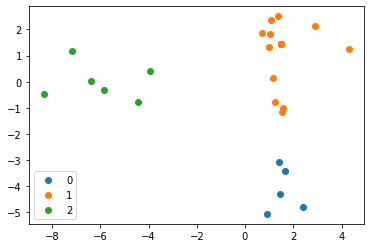

In [425]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(cluster_raw,cluster.labels_)
cluster_new = lda.transform(cluster_raw)

# print(cluster_new)
for cluster_num in range(cluster.cluster_centers_.shape[0]):
    d=cluster_new[cluster.labels_==cluster_num]
    # print(d)
    plt.scatter(d[:,0],d[:,1],label=cluster_num)

plt.legend(loc="best")
plt.show()

d:\ANACONDA\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\ANACONDA\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ -72.30675   , -123.06723   ],
       [  37.786453  ,  -84.06941   ],
       [ 102.58773   ,   22.458698  ],
       [  26.618662  ,  112.16829   ],
       [   3.1090915 ,  169.44745   ],
       [ -48.43284   ,  130.6336    ],
       [ -37.73966   ,  -21.229555  ],
       [  81.57965   ,  -42.49721   ],
       [  81.84364   ,  147.24837   ],
       [-144.62157   ,   53.18735   ],
       [ 147.32579   ,  -22.970427  ],
       [ -18.705656  ,   77.50828   ],
       [  64.985825  , -138.3485    ],
       [ 118.74891   ,  -90.87653   ],
       [ -98.65965   ,    4.2615404 ],
       [ -24.568888  ,  -78.58807   ],
       [-116.40703   ,  126.7285    ],
       [  14.9683485 ,  -34.481083  ],
       [ -83.26711   ,   74.15333   ],
       [  -6.0323    , -138.4884    ],
       [-132.97081   ,  -85.47853   ],
       [ 154.04285   ,   59.30205   ],
       [-155.28246   ,  -18.145329  ],
       [  93.880554  ,   85.471375  ],
       [   0.80335206,   22.19849   ],
       [  51.963783  ,   

In [403]:
tsne.embedding_

array([[ -72.30675   , -123.06723   ],
       [  37.786453  ,  -84.06941   ],
       [ 102.58773   ,   22.458698  ],
       [  26.618662  ,  112.16829   ],
       [   3.1090915 ,  169.44745   ],
       [ -48.43284   ,  130.6336    ],
       [ -37.73966   ,  -21.229555  ],
       [  81.57965   ,  -42.49721   ],
       [  81.84364   ,  147.24837   ],
       [-144.62157   ,   53.18735   ],
       [ 147.32579   ,  -22.970427  ],
       [ -18.705656  ,   77.50828   ],
       [  64.985825  , -138.3485    ],
       [ 118.74891   ,  -90.87653   ],
       [ -98.65965   ,    4.2615404 ],
       [ -24.568888  ,  -78.58807   ],
       [-116.40703   ,  126.7285    ],
       [  14.9683485 ,  -34.481083  ],
       [ -83.26711   ,   74.15333   ],
       [  -6.0323    , -138.4884    ],
       [-132.97081   ,  -85.47853   ],
       [ 154.04285   ,   59.30205   ],
       [-155.28246   ,  -18.145329  ],
       [  93.880554  ,   85.471375  ],
       [   0.80335206,   22.19849   ],
       [  51.963783  ,   

d:\ANACONDA\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\ANACONDA\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


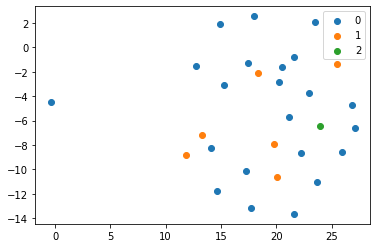

In [417]:
tsne=TSNE()
tsne.fit_transform(cluster_raw)  #进行数据降维,降成两维

for cluster_num in range(cluster.cluster_centers_.shape[0]):
    d=tsne.embedding_[cluster.labels_==cluster_num]
    # print(d)
    plt.scatter(d[:,0],d[:,1],label=cluster_num)

plt.legend(loc="best")
plt.savefig("1.jpg")
plt.show()



In [346]:
# tsne[:][0]
cluster_raw.shape

(29, 7)